## Preamble



In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from getdist import plots, loadMCSamples

## Definitions



Define default data directory and what CMB parameter names are.



In [33]:
file_root = "./data/mcmc_pslike_tt-te-ee/mcmc"
cosmo_params = [
    "cosmomc_theta",
    "logA",
    "ns",
    "ombh2",
    "omch2",
    "H0",
    "Alens"
]

## MCMC chains



Have a look at how chains evolve with time and check convergence or not.



In [34]:
def plot_chains(file_root, params, nrow=None, ncol=None):
  from getdist.chains import chainFiles
  files = chainFiles(file_root, separator=".")

  nrow = len(params)//2 if nrow is None else nrow
  ncol = len(params)//2 if ncol is None else ncol
  plt.figure(figsize=(15, 10))

  # Loop over files independantly
  for f in files:
    sample = loadMCSamples(f[:-4])
    color = "C{}".format(f.split(".")[-2])

    # Get param values
    values = sample.getParams()

    # Get associated LaTeX labels
    labels = sample.paramNames.parsWithNames(cosmo_params)
    for i, p in enumerate(params):
      ax = plt.subplot(nrow, ncol, i+1)
      ax.set_ylabel(labels[i].latexLabel())
      ax.plot(getattr(values, p), alpha=0.75, color=color)

  plt.tight_layout()

Plot chains for the CMB parameters



/home/garrido/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


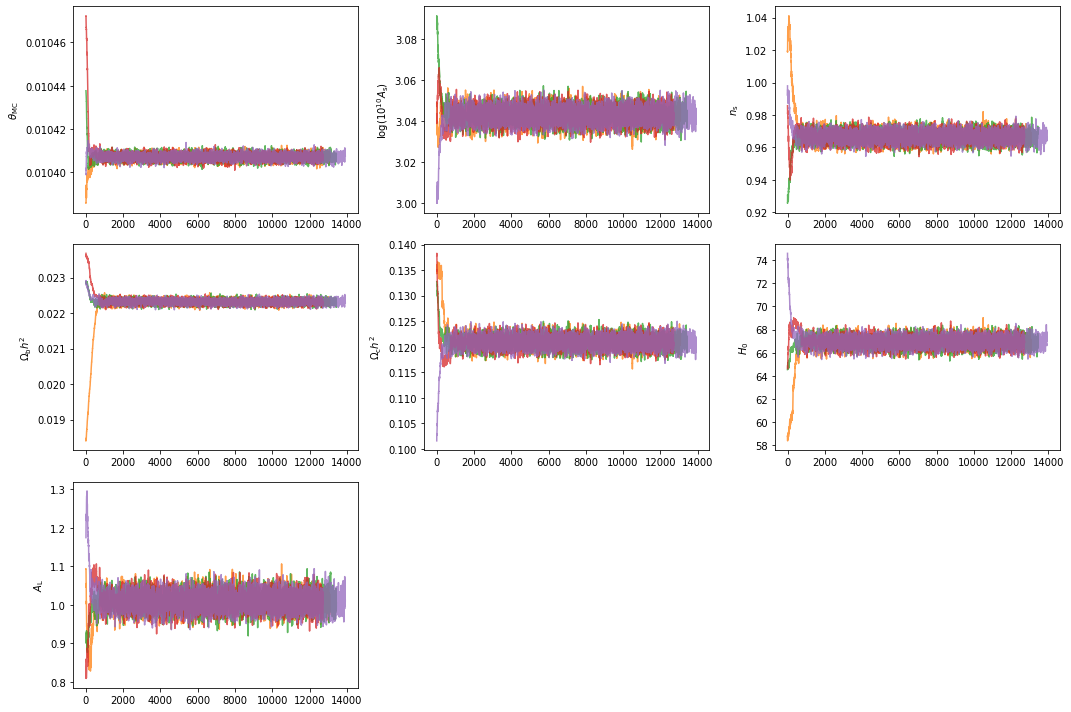

In [35]:
plot_chains(file_root, params=cosmo_params)

## MCMC distributions



Load the different chains into one weighted sample with burnin corresponding to 40% of the chains.



In [36]:
sample = loadMCSamples(file_root, settings={"ignore_rows": 0.4})

Show input values from simulation.



In [37]:
def show_input(g, params):
    inputs = {
        "cosmomc_theta": 0.0104085,
        "logA": 3.044,
        "ombh2": 0.02237,
        "omch2": 0.1200,
        "ns": 0.9649,
        "Alens": 1.0,
        "H0": 67.36
    }
    for i, p in enumerate(params):
        x = inputs.get(p, np.nan)
        kwargs = dict(color="gray", ls="--", lw=1)
        for ax in g.subplots[:,i]:
            if ax: ax.axvline(x, **kwargs)
        for ax in g.subplots[i,:i]:
            if ax: ax.axhline(x, **kwargs)

### Triangle plot



/home/garrido/.local/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


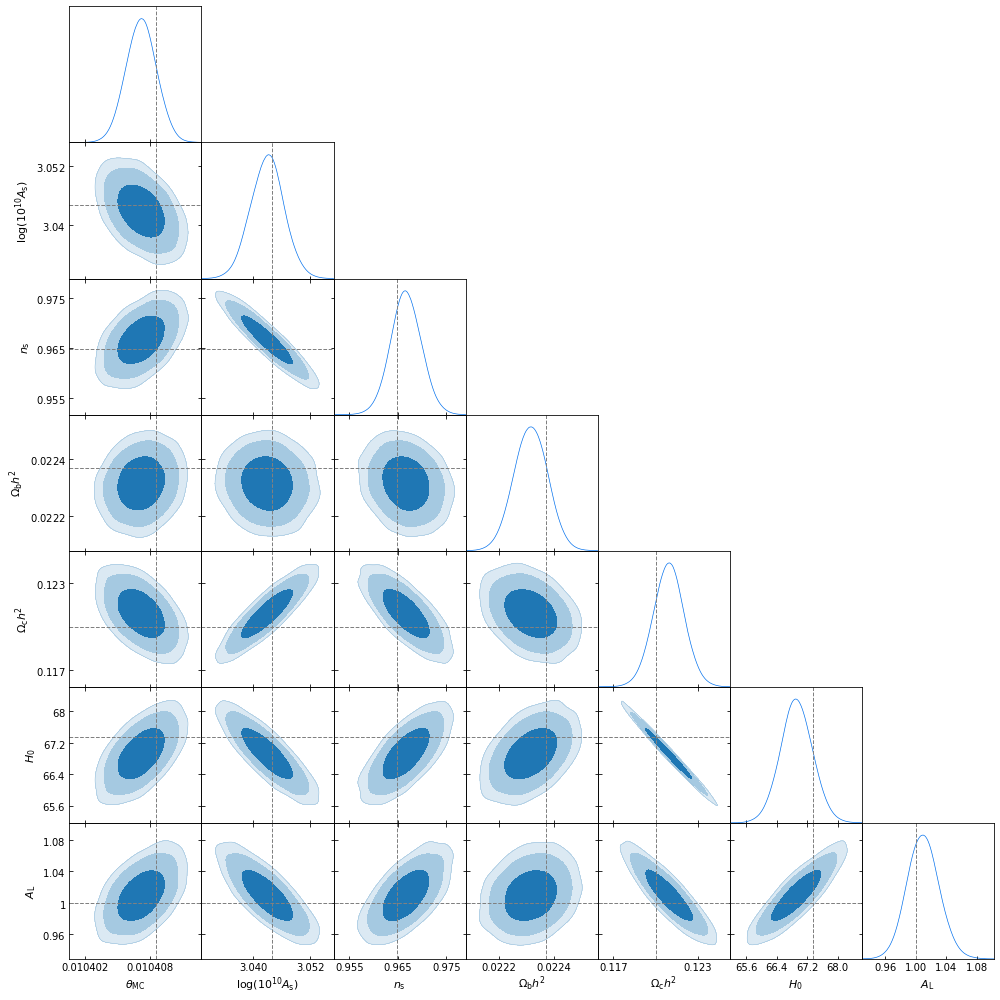

In [38]:
g = plots.getSubplotPlotter()
g.settings.num_plot_contours = 3
g.settings.lineM = ["-CO"]
g.triangle_plot(sample, cosmo_params, filled=True, colors=["C0"])
show_input(g, cosmo_params)

### Table



In [39]:
from IPython.display import HTML, display
import tabulate
table = sample.getTable().tableParamNames
results = [[par.latexLabel(), par.mean, par.err] for j, par in enumerate(table.names)
                                              if table.name(j) in cosmo_params]
display(HTML(tabulate.tabulate(results, headers=["Parameter", "mean", "std."], tablefmt="html")))

/home/garrido/.local/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Parameter,mean,std.
$\theta_\mathrm{MC}$,0.0104072,1.40964e-06
$\log(10^{10} A_\mathrm{s})$,3.04293,0.00355408
$n_\mathrm{s}$,0.96668,0.0031741
$\Omega_\mathrm{b}h^2$,0.022315,6.16766e-05
$\Omega_\mathrm{c}h^2$,0.120931,0.00110346
$A_\mathrm{L}$,1.0096,0.0211548
$H_0$,66.9218,0.426916
